<p><a id="top"> </a></p>

# Master M2 MVA 2018/2019 - Graphical models - Homework 1


<h4>Students</h4>
<ul>
    <li>Grégoire Boussac : gregoire.boussac@eleves.enpc.fr</li>
    <li>Matthieu Toulemont : matthieu.toulemont@eleves.enpc.fr</li>
</ul>

<ul>
    <li><a href ='#1'>Learning in discrete graphical models</a></li>
    <li><a href ='#2'>Linear classification</a></li>
    <ul>
        <li><a href ='#2.1'>Generative Model : LDA</a> (<a href="#2.1a">a</a>, <a href="#2.1b">b</a>)</li>
        <li><a href ='#2.2'>Logistic Regression</a> - <a href="#2.2a">a</a></li>
        <li><a href ='#2.3'>Linear Regression</a> - <a href="#2.3a">a</a></li>
        <li><a href ='#2.4'>Test data</a> - (<a href="#2.4a">a</a>, <a href="#2.4b">b</a>)</li>
        <li><a href ='#2.5'>Generative Model : QDA</a> - (<a href="#2.5a">a</a>, <a href="#2.5b">b</a>, <a href="#2.5c">c</a>, <a href="#2.5d">d</a>)</li>
    </ul>
</ul>

In [1]:
#Imports : 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interactive

# Useful function : 
def readfile(cat, dset, with_intercept = True):
    read = lambda cat,dset: pd.read_csv(r"classification_data_HWK1/classification{}.{}".format(cat, dset), sep="\t", header=None,dtype=float)
    df = read(cat, dset)
    df.columns = ["x1","x2","y"]
    if with_intercept:
        df["intercept"] = np.ones(df.shape[0])
    return df
# Useful variables:
X_cols = ["intercept", "x1", "x2"]
Y_col = ["y"]

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# List of the files
list_files = ['A', 'B', 'C']

<h2><a id="1">I : Learning in discrete graphical models.</a></h2>

<p><i>Consider the following model : $z$ and $x$ are discrete variables taking respecctively $M$ and $K$ different values with $p(z = m)=\pi_m$ and $p(x = k | z = m) = \theta_{mk}$. 

Compute the MLE for both $\pi$ and $\theta$ based on an i.i.d sample of observations. Please provide succinctly your derviations and not just the final ansswer.</i> </p>

<p><a href="#top">Back to the top</a></p>

$z$ et $x|z$ suivent des lois multinomiales de paramètres $\theta$ et $\pi$.
    Utilisons l'encodage one-hot, comme vu en cours :  $z_m=\mathbb{1}_{\{z=m\}}$ et $x_k=\mathbb{1}_{\{x=k\}}$. On peut donc écrire la loi de $z$ et celle de $x|z$ :
    
$$p(z) = \prod_{m=1}^M \pi_{m}^{z_m}$$
et 
$p(x|z=m) = \prod_{k=1}^K \theta_{mk}^{x_k z_m}$ car $\mathbb{1}_{\{x=k, z=m\}} = \mathbb{1}_{\{x=k\}}\mathbb{1}_{\{z=m\}}$ 
    
La loi jointe des deux variables est donc :
$$p_{\theta,\pi}(x,z) = \prod_{m=1}^M \Bigg[ \pi_{m}^{z_m} \prod_{m=1}^M \theta_{mk}^{x_k z_m} \Bigg]$$ 
    
Considérons un échantillon de $N$ observations i.i.d $\{(x^1,z^1), ..., (x^N,z^N)\}$ du couple $(x,z)$. La log-vraisemblance est alors :
    
$$ l(\theta, \pi) = \sum_{n=1}^N p_{\theta,\pi}(x^n,z^n)
        = \sum_{n=1}^N \Bigg[ \sum_{m=1}^M \Big[ z_m^n log(\pi_m) + \sum_{k=1}^K x_k^n z_m^n log(\theta_{mk})   \Big] \Bigg]
    $$
    
Nous cherchons à maximiser cette expression, sous contrainte que :
    $\sum_{m=1}^M \pi_m = 1$  et $\sum_{k=1}^K \theta_{mk} = 1, \forall m \in [1,M]$ car ce sont des probabilités.
    
La fonction $l(\theta, \pi)$ est concave, car c'est une somme de $log$ à coefficients positifs. De plus, les contraintes d'égalité sont affines et il est existe une solution admissible. Donc le maximum global de $l(\theta, \pi)$, sous contraintes, correspond à un point d'annulation du Lagrangien associé au problème.
    
$$L(\theta, \pi, \lambda) = l(\theta, \pi) + \lambda_0\Big( 1 - \sum{m=1}^M \pi_m \Big) + \sum_{m=1}^M \Bigg( \lambda_m\Big( 1 - \sum_{k=1}^K \theta_{mk} \Big) \Bigg)$$
où $\lambda \in \mathbb{R}^{M+1}$ correspond au vecteur des multiplicateurs de Lagrange.
    
$$\frac{\partial L}{\partial \pi_m}(\widehat{\theta}, \widehat{\pi}) = \frac{\sum_{n=1}^N z_m^n}{\widehat{\pi_m}} - \lambda_0 = 0 \iff \widehat{\pi_m} = \frac{\sum_{m=1}^M z_m^n}{\lambda_0}, \forall m \in [ 1,M ]$$
    
et
    
$$\frac{\partial L}{\partial \theta_{mk}}(\widehat{\theta}, \widehat{\pi}) = \frac{\sum_{k=1}^K x_k^n z_m^n}{\widehat{\theta_{mk}}} - \lambda_m = 0 \iff \widehat{\theta_{mk}} = \frac{\sum_{m=1}^M x_k^n z_m^n}{\lambda_m}, \forall m \in [ 1,M ], \forall k \in [ 1,K ]$$
    
or $\sum_{m=1}^M \pi_m = 1$  et $\sum_{k=1}^K \theta_{mk} = 1, \forall m \in [ 1,M ]$
    
donc $\lambda_0 = \sum_{n=1}^N \sum_{m=1}^M z_m^n$ et $\lambda_m = \sum_{n=1}^N \sum_{m=1}^M z_m^n x_k^n$.
    
Nous pouvons donc conclure que l'estimateur du maximum de vraisemblance de $\theta$ et celui de $\pi$ sont :
$\widehat{\theta} = (\widehat{\theta_{mk}})_{1 \leq m \leq M, 1 \leq k \leq K}$ et $\widehat{\pi} = (\widehat{\pi_m})_{1 \leq m \leq M}$
    
avec
$$\widehat{\theta_{mk}} = \frac{\sum_{m=1}^M x_k^n z_m^n}{\sum_{n=1}^N \sum_{m=1}^M x_k^n z_m^n}, \quad \widehat{\pi_m} = \frac{\sum_{m=1}^M z_m^n}{\sum_{n=1}^N \sum_{m=1}^M z_m^n}$$

<h2><a id="2"> II : Linear classification</a></h2>

<p><i>The files classificationA.train, classificationB.train and classificationC.train contain samples of data $(x_n,y_n)$ where $xx_n\in \mathbb{R}²$ and $y_n\in \{0,1\}$ (each line of each file contains the 2 components of $x_n$ then $y_n$). The goal of this exercise is to implement linear classification methods and to test them on the three data sets.</i></p>

<h3><a id="2.1"> II-1 :  Generative Model (LDA). </a></h3>
<p><i>Given the class variablle, the data are assumed to be Gausssian with different classes but with the same covariance matrix</i></p>

$y \overset{\mathcal{L}}{=} Bernoulli(\pi)$

$x|\{y = i\}\overset{\mathcal{L}}{=}Normal(\mu_i, \Sigma)$


<ul>
    <li><b>(a)</b> Derive the form of the MLE for this model. <i>Indication : </i> the model was presented in classs but not the MLE computations. Compare $p(y = 1|x)$ with the form of logistic regression</li>
    <li><b>(b)</b> Implement the MLA for this modell and apply it to the data. Represent graphically the data as a point cloud in $\mathbb{R}²$ and the line defined by the equation $p(y = 1|x) = 0.5$</li>
</ul>

<p><a href="#top">Back to the top</a></p>

<a id = "2.1a">Question (a) </a>

$p(y) = \Pi^y(1-\Pi)^{1-y}$
$$p(x|y) = \frac{1}{(2\pi)^{\frac{d}{2}}|\Sigma|{\frac{1}{2}}}e^{-\frac{1}{2}(x-\mu_y)^T\Sigma^{-1}(x-\mu_y)}$$


<h5>MLE :</h5> 

$$\Pi = \frac{1}{n}\sum_{k = 1}^n y_k$$
$$\forall i \in \{0,1\}, N_i = \sum_{j,y_j = i}y_j$$
$$\forall i \in \{0,1\}, \mu_i = \frac{1}{N_i}\sum_{j, y_j = 1} x_j$$

$$\Sigma = \frac{1}{n}\sum_{j = 1}^n (x_j-\widehat{\mu_{y_j}})^T(x_j-\widehat{\mu_{y_j}})$$

<h5>p(y|x)</h5>

$$p(y|x) = p(y)p(x|y)$$
$$p(y|x) = \Pi^y(1-\Pi)^{1-y}\frac{1}{(2\pi)^{\frac{d}{2}
}|\Sigma|^{\frac{1}{2}}}e^{-\frac{1}{2}(x-\mu_y)^T\Sigma^{-1}(x-\mu_y)}$$


Let's note : $D_i = -\frac{1}{2}(x-\mu_i)^T\Sigma^{-1}(x-\mu_i)$, $i\in \{0,1\}$,$F =\frac{1}{(2\pi)^{\frac{d}{2}
}|\Sigma|^{\frac{1}{2}}} $
$$p(y = 1|x) = \frac{p(y=1)p(x|y)}{p(x)}$$

$$p(y = 1|x) = \frac{\Pi F e^{D_1}}{\Pi F e^{D_1}+(1-\Pi)Fe^{D_0}} $$
$$p(y = 1|x) = \frac{1}{1+\frac{(1-\Pi)Fe^{D_0}}{\Pi F e^{D_1}}} $$
$$p(y = 1|x) = \frac{1}{1+e^{D_0 - D_1+log(\frac{(1-\Pi)}{\Pi})}} $$


$D_0 - D_1 = -\frac{1}{2}(x-\mu_0)^T\Sigma^{-1}(x-\mu_0) - (-\frac{1}{2}(x-\mu_1)^T\Sigma^{-1}(x-\mu_1))$


$D_0 - D_1 =\frac{1}{2}(\mu_1^T\Sigma^{-1}\mu_1-\mu_0^T\Sigma^{-1}\mu_0) +(\mu_0 - \mu_1)^T\Sigma^{-1}x$

Thus : 
$$p(y = 1|x) = \frac{1}{1+e^{log(\frac{(1-\Pi)}{\Pi})+ \frac{1}{2}(\mu_1^T\Sigma^{-1}\mu_1-\mu_0^T\Sigma^{-1}\mu_0) +(\mu_1 - \mu_0)^T\Sigma^{-1}x}}  = \sigma(a +b^Tx)$$

where $a = log(\frac{(\Pi)}{1-\Pi})-\frac{1}{2}(\mu_1^T\Sigma^{-1}\mu_1-\mu_0^T\Sigma^{-1}\mu_0)$, $b = \Sigma^{-1}(\mu_1 - \mu_0)$ and $\sigma$ is the sigmoid function. We end up with model that has the same form as a logistic regression.
<p><a href="#top">Back to the top</a></p>

$x_n \in \mathcal{R}$ donc nous sommes dans le cas où $d=2$.
Dans le cas de la régression logistique, le nombre de paramètres est de l'ordre de $d$ ($d$ ou $d+1$).
Tandis que dans le cas de la LDA, le nombre de paramètres est de $d^2+3$. Il y a donc plus de paramètres.

Par ailleurs, pour la LDA, on a fait une hypothèse gaussienne sur $x|{y=i}$. Donc en général, la LDA marchera mieux que la régression logistique, sauf si l'hypothèse de normalité n'est pas du tout respectée.

<a id = "2.1b">Question (b) </a>

In [2]:
def LDA(df):
    PI = df['y'].mean()
    X0 = df[df['y'] == 0][Xc].values
    X1 = df[df['y'] == 1][Xc].values
    mu0 = np.mean(X0, axis=0)
    mu1 = np.mean(X1, axis=0)

    S0 = ((X0 - mu0).T).dot((X0 - mu0))
    S1 = ((X1 - mu1).T).dot((X1 - mu1))
    S = (S0+S1)*1/df.shape[0]
    return dict(zip(params_names, [PI, mu0, mu1, S ]))

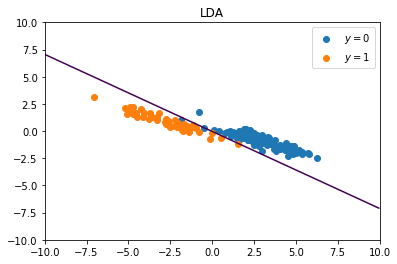

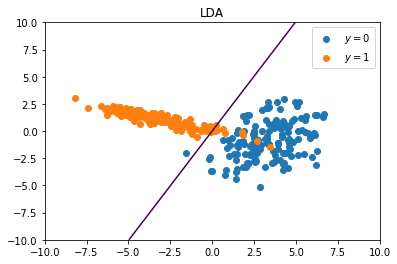

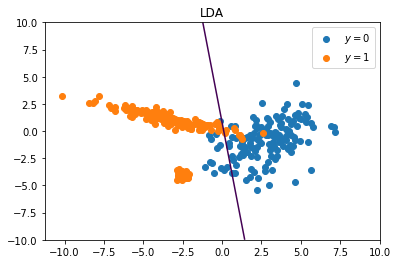

In [69]:
D_LDA = lambda i,x,params: -0.5*(x-params['mu'+str(i)]).T.dot(np.linalg.inv(params['S'])).dot(x-params['mu'+str(i)])

for file in list_files:
    #
    df = readfile(file, 'train', with_intercept=False)
    params_names = ['PI', 'mu0', 'mu1', 'S']

    #
    Xc = ['x1', 'x2']
    paramsLDA = LDA(df)
    probLDA = lambda x, params: 1/(1+np.exp(np.log((1-params['PI'])/(params['PI'])) + \
                                            0.5*(params['mu1'].T.dot(np.linalg.inv(params['S'])).dot(params['mu1'])\
                                            -params['mu0'].T.dot(np.linalg.inv(params['S'])).dot(params['mu0']) + 
                                                (params['mu0']-params['mu1']).T.dot(np.linalg.inv(params['S'])).dot(x) )))

    #
    CoefsLineLDA = lambda params:(params['mu1']-params['mu0']).T.dot(np.linalg.inv(params['S']))
    C = CoefsLineLDA(paramsLDA)
    X = df[Xc].values
    Y = df['y'].values
    PI = np.mean(Y)
    LineLDA =  lambda x, C, offset: ((1-offset)/offset - C[0]*x)/C[1]
        
    #
    N = 100
    x = np.linspace(-10,10,N)
    y = np.linspace(-10,10,N)
    x,y = np.meshgrid(x,y)
    Z = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            Z[i,j] = probLDA(np.array([x[i,j], y[i,j]]), paramsLDA)

    for yt in [0,1]:
        plt.scatter(df[df['y'] == yt]['x1'], df[df['y'] == yt]['x2'], label="$y={}$".format(yt))
   
    plt.contour(x,y,Z,[0.5])
    plt.ylim(-10,10)
    plt.legend()
    plt.title('LDA')
    plt.savefig(file + "LDA.png")
    plt.show()

<h3><a id="2.2">II-2 :  Logistic regression </a></h3>

<p><i>Implement the logisitic regression for an affine function $f(x)=w^Tx + b$ (do not forget the constant term), uisng IRLS algorithm (Newton-Raphson) which was described in class.</i></p>

<ul>
    <li><b>(a)</b> Represent graphically the data as a cloud point in $\mathbb{R}²$ as well as the line defined by the equation $p(y = 1|x) = 0.5$</li>
</ul>

<p><a href="#top">Back to the top</a></p>

<a id = "2.2a">Question (a)</a>

<p>We asssume that $p(y|x) = \sigma(f(x,w))$ where $f(X_{design}, w)=w^TX$ and $X = (X_{design}, 1)^T$</p>
<p>We will implement the Newton-Raphson method for the logistic regression.</p>
$$w^{t+1} = w^{t} - H_w(L)^{-1}\nabla_w L$$

<p>Where : </p>

$$\sigma(z) = \frac{1}{1+e^{-z}}$$
$$L = \sum_{i=1}^n y_i \log(\sigma(w^Tx_i)) + (1-y_i) \log(\sigma(-w^Tx_i))$$
$$\nabla_w L = X^T(Y - \sigma(w^TX))$$
$$ H_w(L) = - X^T Diagonal[\sigma(w^TX)\sigma(-w^TX)]X $$ 

In [5]:
sigmoid = lambda z: 1/(1+np.exp(-z))
f = lambda x,w: x.dot(w) # The intercept is defined in x
likelihood = lambda Y,X,w: np.sum(Y*np.log(sigmoid(f(X,w)))+ (1-Y)*np.log(sigmoid(-1*f(X,w))))


grad_sigmoid = lambda z: sigmoid(z)*(sigmoid(-z))
GradientLi = lambda Y,X,w : (X.T).dot(Y - sigmoid(f(X,w)))
HessianLi = lambda X,w: -(X.T).dot(np.diag((sigmoid(f(X,w))*(1-sigmoid(f(X,w)))).flatten())).dot(X)

In [6]:
NR_step = lambda Y,X,w,eps: w - eps*np.linalg.inv(HessianLi(X,w)).dot(GradientLi(Y,X,w))

In [7]:
def NewtonRaphsonLR(Niter, df, eps):
    X = df[X_cols].values 
    Y = df[Y_col].values
    w = np.array([0,0.5,1]).reshape(-1,1)
    W = [w]
    for i in range(Niter):
        w = NR_step(Y,X,w, eps)
        W.append(w)
    del X, Y
    return W

probLog = lambda x,w: 1/(1+np.exp(-f(x,w)))

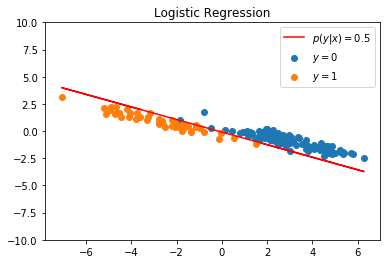

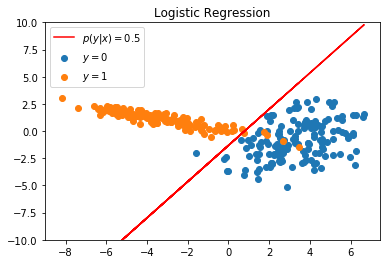

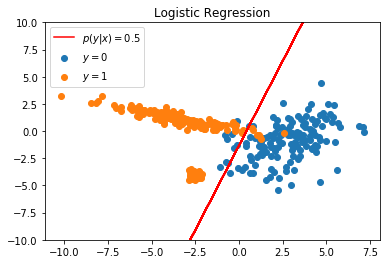

In [70]:
for file in list_files:
    df = readfile(file, 'train', with_intercept=True)
    eps = 0.01
    Niter = 2000
    W = NewtonRaphsonLR(Niter, df, eps)
    Line = lambda x1,w: -(w[0]+w[1]*x1)/w[2]
    def plotLine(Iteration):
        for y in [0,1]:
            plt.scatter(df[df['y'] == y]['x1'], df[df['y'] == y]['x2'], label="$y={}$".format(y))
        plt.plot(df['x1'].values, Line(df['x1'].values, W[Iteration]), label="$p(y|x)=0.5$", c='red')
        plt.ylim(-10,10)
        plt.legend()
        plt.title('Logistic Regression')
        if Iteration == -1:
            plt.savefig(file + "Logistic.png")
        plt.show()
    plotLine(-1)

<h3><a id="2.3">II-3 :Linear regression </a></h3>
<p><i>consider the class $y$ as a real-valued variable taking the values 0 and 1 only. Implement linear regression( for an affine function $f(x)=w^Tx+ b$) by solving the normal equations.</i></p>

<ul>
    <li><b>(a)</b> Represent graphically the data as a cloud poinnt in $\mathbb{R}²$ as well as the line defined by the equation $p(y = 1|x) = 0.5$</li>
</ul>

<p><a href="#top">Back to the top</a></p>

 <a id = "2.3a">Question (a) </a>

- Les équations normales sont les suivantes : $X^{T}Xw-X^{T}y = 0$.

    Si $X^TX$ est inversible, alors $\hat{w}^{MLE} = (X^{T}X)^{−1}X^{T}y$.

- $p(y=1|x) = w_1x_1 +w_2x_2 + w_0$
donc $p(y=1|x) = 0.5$ => $x_2 = \frac{0.5 - w_1x_1 - w_0}{w_2}$

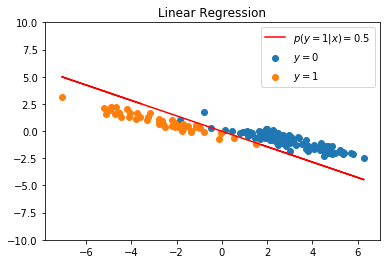

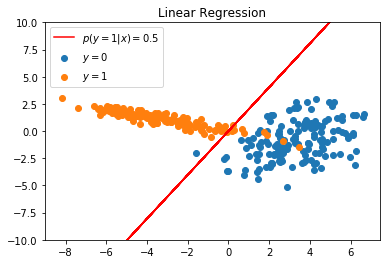

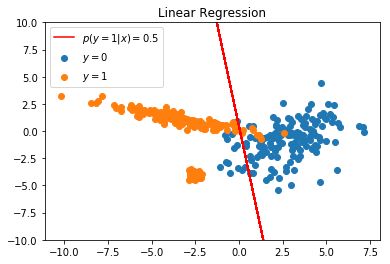

In [39]:
probLR = lambda x,w : f(x,w)>00.5
for file in ['A', 'B', 'C']:
    df = readfile(file, "train")
    NormalEquation = lambda X, Y: np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
    wc = NormalEquation(df[X_cols].values, df[Y_col].values)
    Line = lambda x1,w,s: (s-w[0]-w[1]*x1)/w[2]
    def plotLineLinR(W):
        for y in [0,1]:
            plt.scatter(df[df['y'] == y]['x1'], df[df['y'] == y]['x2'], label="$y={}$".format(y))

        plt.plot(df['x1'].values, Line(df['x1'].values, W,0.5), label="$p(y=1|x)=0.5$", c='red')
        plt.ylim(-10,10)
        plt.legend()
        plt.title('Linear Regression')
        plt.savefig(file + "LR.png")
        plt.show()

    plotLineLinR(wc)

<h3><a id="2.4">II-4 : Test Data</a></h3>
<p><i>Data in the files classificationA.test, classificationB.test and classsificationC.test are respectively drawn from the same distribution as the data in the files classificationA.train, classificationB.train and classificationC.train. Test the different models learnt from the corresponding training data on these test data.</i></p>

<ul>
    <li><b>(a)</b> Compute for each model the misclassification error (I.e. the fraction of data misclassified) on the training data and compute it as well on the test data.</li>
    <li><b>(b)</b> Compare the performances of the different methods on the three datasets. Is the misclassification error larger, smaller, or similar on the training and test data ? Why ? Which methods yield very similar / dissimilar results ? Provide an interpretation. </li>
</ul>
<p><a href="#top">Back to the top </a></p>

 <a id = "2.4a">Question (a)</a>

In [60]:
misclassificationError = lambda pred,y: 1-np.mean((pred>0.5) == y)

results = dict()
for method in ['LDA', 'Logistic', 'Linear Regression','QDA']:
    results[method]= pd.DataFrame(index = ['train','test'], columns=list_files)

params = dict()

for method in ['LDA', 'Logistic', 'Linear Regression', 'QDA']:
    params[method] = dict()
    
for file in list_files:
    for mode in ['train', 'test']:
        df = readfile(file, mode)
        
        # LDA
        if mode == "train":
            paramsLDA = LDA(df[['x1', 'x2', 'y']])
            params['LDA'][dataset] = paramsLDA
        else:
            paramsLDA = params['LDA'][dataset]
        predLDA = np.array(list(map(lambda i: probLDA(df[Xc].values[i,:], paramsLDA), range(df.shape[0]))))
        results['LDA'].loc[mode][dataset] = misclassificationError(predLDA, df['y'])
        
        # Logistic Regression
        if mode == "train":
            Niter = 500
            if dataset =='A':
                eps=1
            else:
                eps= 0.01
            W = NewtonRaphsonLR(Niter, df, eps)
            w = W[-1]
            params['Logistic'][dataset] = w
        else:
            w = params['Logistic'][dataset]
        predLog = np.array(list(map(lambda i: probLog(df[X_cols].values[i,:], w), range(df.shape[0])))).flatten()
        results['Logistic'].loc[mode][dataset] = misclassificationError(predLog, df['y'])
        
        
        # Linear Regression
        if mode == "train":
            wlin = NormalEquation(df[X_cols].values, df[Y_col].values)
            params['Linear Regression'][dataset] = wlin
        else:
            wlin = params['Linear Regression'][dataset]
        predLR = np.array(list(map(lambda i: probLR(df[X_cols].values[i,:], wlin), range(df.shape[0])))).flatten()
        results['Linear Regression'].loc[mode][dataset] = misclassificationError(predLR, df['y'])

for method in results:
    if method != 'QDA':
        display(HTML("""<h5>{}</h5>""".format(method)))
        display(results[method])

,A,B,C
train,0.0133333,0.03,0.055
test,0.0206667,0.0415,0.0443333


,A,B,C
train,0,0.02,0.04
test,0.036,0.042,0.0236667


,A,B,C
train,0.0133333,0.03,0.055
test,0.0206667,0.0415,0.0423333


<h3><a id="2.5">II-5 : QDA model</a></h3>
<p><i>We finally relax the assumption that the covariance matrices for the classes are the same. So, given the class label the ddata are assumed to be Gausssian with means and coravariance matrices which are a priori different.</i></p>

$y \overset{\mathcal{L}}{=} Bernoulli(\pi)$

$x|\{y = i\}\overset{\mathcal{L}}{=}Normal(\mu_i, \Sigma_i)$

Implement the maximum likelihood estimator and apply it to the data.

<ul>
    <li><b>(a)</b> Derive the form of the maximum likelihood estimator for this model.</li>
    <li><b>(b)</b> Represent graphically the data as well as the conic defined by $p(y = 1|x) = 0.5$</li>
    <li><b>(c)</b> Compute the misclassification error for $QDA$ for both train and test data.</li>
    <li><b>(d)</b> Comment the results as previously.</li>
</ul>

<a id = "2.5a">Question (a)</a>

<b>MLE</b>
$$\Pi = \frac{1}{n}\sum_{k = 1}^n y_k$$
$\forall i \in \{0,1\},$
$$ N_i = \sum_{j,y_j = i}y_j$$
$$ \hat{\mu_i} = \frac{1}{N_i}\sum_{j, y_j = i} x_j$$

$$\hat{\Sigma_i} = \frac{1}{N_i}\sum_{j = 1,y_j = i}^n (x_j-\hat{\mu_{y_j}})^T(x_j-\hat{\mu_{y_j}})$$

In [63]:
params_namesQDA = ['PI', 'mu0', 'mu1', 'S0', 'S1']
def QDA(df):
    Xc = ['x1', 'x2']
    
    PI = df['y'].mean()
    X0 = df[df['y'] == 0][Xc].values
    X1 = df[df['y'] == 1][Xc].values
    mu0 = np.mean(X0,axis = 0)
    mu1 = np.mean(X1, axis = 0)

    S0 = ((X0 - mu0).T).dot((X0 - mu0))
    S1 = ((X1 - mu1).T).dot((X1 - mu1))
    S0 = S0/X0.shape[0]
    S1 = S1/X1.shape[0]
    return dict(zip(params_namesQDA, [PI, mu0, mu1, S0,S1 ]))
LPI = lambda params: np.log((1-params['PI'])/params['PI'])

detR = lambda params: np.sqrt(np.linalg.det(params['S1'])/np.linalg.det(params['S0']))
D = lambda i,x,params: -0.5*(x-params['mu'+str(i)]).T.dot(np.linalg.inv(params['S'+str(i)])).dot(x-params['mu'+str(i)])
probQDA = lambda x,params: 1/(1+detR(params)*np.exp(LPI(params) + D(0,x,params)-D(1,x,params)))

<a id = "2.5a">Question (b)</a>
Given the Bayes formula,

$$p(y = 1|x) = \frac{p(y=1)p(x|y=1)}{p(x)}$$
$$p(y = 1|x) = \frac{p(y=1)p(x|y=1)}{p(x|y = 1)p(y=1)+p(x|y = 0)p(y=0)}$$
$$p(y)p(x|y) = \pi^y(1-\pi)^{1-y}\frac{1}{(2\pi)^{\frac{d}{2}
}|\Sigma_y|^{\frac{1}{2}}}e^{-\frac{1}{2}(x-\mu_y)^T\Sigma_y^{-1}(x-\mu_y)}$$


As before let's note : $D_y = -\frac{1}{2}(x - \mu_y)^T\Sigma_y^{-1}(x - \mu_y)$ and $A_y = \frac{1}{(2\pi)^{\frac{d}{2}} |\Sigma_y|^{\frac{1}{2}}}$

$$p(y = 1|x) = \frac{\pi A_1 e^{D_1}}{\pi A_1 e^{D_1} + (1-\pi) A_0 e^{D_0}}
$$

$$p(y = 1|x) = \frac{1}{1 + \frac{A_0}{A_1}e^{D_0-D_1 + \log{\frac{1-\pi}{\pi}}}}$$


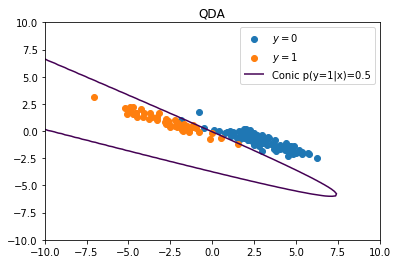

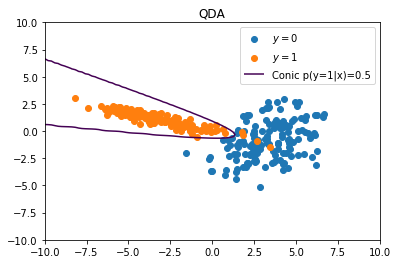

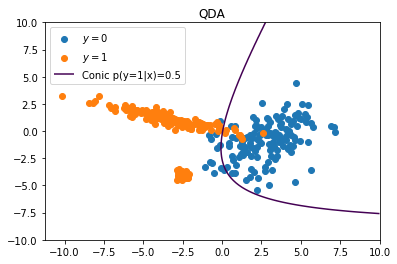

In [64]:
for file in list_files:
    df = readfile(file, 'train')
    paramsQDA = QDA(df[['x1', 'x2', 'y']])
    
        
    N = 100
    x = np.linspace(-10,10,N)
    y = np.linspace(-10,10,N)
    x,y = np.meshgrid(x,y)
    Z = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            Z[i,j] = probQDA(np.array([x[i,j], y[i,j]]), paramsQDA)

    for i in [0,1]:
        plt.scatter(df[df['y']==i]['x1'], df[df['y']==i]['x2'], label = "$y = {}$".format(i))
    c = plt.contour(x,y,Z,[0.5])
    c.collections[0].set_label('Conic p(y=1|x)=0.5')
    plt.legend()
    plt.title('QDA')
    plt.savefig(file+"QDA.png")
    plt.show()

<a id = "2.5c">Question (c)</a>

In [65]:
for dataset in list_files:
    for mode in ['train', 'test']:
        df = readfile(dataset,mode)
        
        # QDA
        if mode == "train":
            paramsQDA = QDA(df[['x1', 'x2', 'y']])
            params['QDA'][dataset] = paramsQDA
        else:
            paramsQDA = params['QDA'][dataset]
        predQDA = np.array(list(map(lambda i: probQDA(df[Xc].values[i,:], paramsQDA), range(df.shape[0]))))
        results['QDA'].loc[mode][dataset] = misclassificationError(predQDA, df['y'])
for method in results:
    display(HTML("""<h5>{}</h5>""".format(method)))
    display(results[method])

,A,B,C
train,0.0133333,0.03,0.055
test,0.0206667,0.0415,0.0443333


,A,B,C
train,0,0.02,0.04
test,0.036,0.042,0.0236667


,A,B,C
train,0.0133333,0.03,0.055
test,0.0206667,0.0415,0.0423333


,A,B,C
train,0.00666667,0.0133333,0.0525
test,0.02,0.02,0.0383333
